<a id='zad1'></a>
***Zadanie 1.*** 

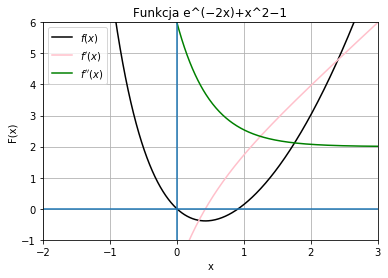

Szacując z wykresu, miejsca zerowe funkcji f(x) sa zbliżone do wartości 0 i 1.


In [16]:
import matplotlib.pyplot as plt
import math
import numpy

def funkcja(x):
    return math.e**(-2*x)+(x**2)-1
def pochodna(x):
    return 2*(-math.exp(-2*x)+x)
def pochodna2(x):
    return 4*math.exp(-2*x)+2

n=numpy.linspace(-3,7,1000)
wektor=[]
wektor2=[]
wektor3=[]

def ciag(z):
    for k in n:
        wektor.append(funkcja(k))
        wektor2.append(pochodna(k))
        wektor3.append(pochodna2(k))
    
ciag(1000)
    
plt.plot(n,wektor,color='Black',label='$f(x)$')
plt.title('Funkcja e^(−2x)+x^2−1')
plt.plot(n,wektor2,color='Pink',label='$f\'(x)$')
plt.plot(n,wektor3,color='Green',label='$f\'\'(x)$')
plt.axhline(0)
plt.axvline(0)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid()
plt.ylim(-1,6)
plt.xlim(-2,3)
plt.show()

print('Szacując z wykresu, miejsca zerowe funkcji f(x) sa zbliżone do wartości 0 i 1.')

<a id='zad2'></a>
***Zadanie 2.*** 

In [10]:
import time
import scipy.optimize as sc
#zakladamy ze a poczatek przedzialu, b koniec, czyli b>a
def bijekcja(f,a,b,e,it):
    if(f(a) * f(b) >= 0): 
        return print("Zły zakres, wykres w tym przedziale nie przecina osi OY")
    if(a>b):
        return print('Zły przedział')
        
    mid=(a+b)/2
    k=0
    while k<it and abs(b-a)>e:
        k+=1
        mid = (a+b)/2
        if (f(mid)*f(a) < 0):
            b = mid
        else:
            a = mid
    return mid, k

print('1.Funkcja jest okreslona\n2.Funkcja jest ciagla w podanym przedziale\n3.Funkcja f(x) na krańcach przedziału <a,b> przyjmuje różne znaki.\n\n\n')

print(bijekcja(funkcja,-0.1,0.1,10**(-10),1000))
print(bijekcja(funkcja,0.8,1.1,10**(-10),1000))

start1=time.time()
bijekcja(funkcja,-0.1,0.1,10**(-10),1000)
stop1=time.time()
start2=time.time()
sc.bisect(funkcja,-0.1,0.1)
stop2=time.time()

start3=time.time()
bijekcja(funkcja,0.8,1.1,10**(-10),1000)
stop3=time.time()
start4=time.time()
sc.bisect(funkcja,0.8,1.1)
stop4=time.time()

print('\n\nCzas wlasnej funkcji: \n',stop1-start1,'  ',stop2-start2)
print('\nCzas wbudowanej funkcji: \n',stop3-start3,'  ',stop4-start4
      print('Metoda bijekcji ma 31 iteracji')




1.Funkcja jest okreslona
2.Funkcja jest ciagla w podanym przedziale
3.Funkcja f(x) na krańcach przedziału <a,b> przyjmuje różne znaki.



(0.09999999990686775, 31)
(0.9165625830879434, 32)


Czas wlasnej funkcji: 
 0.0001480579376220703    0.0001087188720703125

Czas wbudowanej funkcji: 
 0.00013899803161621094    0.00012421607971191406


<a id='zad3'></a>
***Zadanie 3.*** 

In [11]:
def newton(f,p,x0,e,it):
    x = x0 - f(x0)/p(x0)
    y = x0
    k = 0
    while abs(x-y)>e and k<it:
        k+=1
        y = x
        x = y - f(y)/p(y)
    return x,k

print('1.W przedziale [a,b] znajduje się dokładnie jeden pierwiastek.\n2.Funkcja ma różne znaki na krańcach przedziału, tj. f ( a ) ⋅ f ( b ) < 0.\n3.Pierwsza i druga pochodna funkcji mają stały znak w tym przedziale.\n4.Funckja jest ciagla i okreslona w danym przedziale\n\n')

print(newton(funkcja,pochodna,0.1,10**(-10),1000))
print(newton(funkcja,pochodna,0.8,10**(-10),1000))

start1=time.time()
newton(funkcja,pochodna,0.1,10**(-10),1000)
stop1=time.time()
start2=time.time()
sc.newton(funkcja,0.1,pochodna)
stop2=time.time()

start3=time.time()
newton(funkcja,pochodna,0.8,10**(-10),1000)
stop3=time.time()
start4=time.time()
sc.newton(funkcja,0.8,pochodna)
stop4=time.time()

print('\n\nCzas wlasnej funkcji: \n',stop1-start1,'  ',stop2-start2)
print('\nCzas wbudowanej funkcji: \n',stop3-start3,'  ',stop4-start4)
print('Metoda Newtona ma 4 iteracje')


1.W przedziale [a,b] znajduje się dokładnie jeden pierwiastek.
2.Funkcja ma różne znaki na krańcach przedziału, tj. f ( a ) ⋅ f ( b ) < 0.
3.Pierwsza i druga pochodna funkcji mają stały znak w tym przedziale.
4.Funckja jest ciagla i okreslona w danym przedziale


(2.9581990200644026e-17, 4)
(0.916562583105698, 4)


Czas wlasnej funkcji: 
 5.7220458984375e-05    5.602836608886719e-05

Czas wbudowanej funkcji: 
 4.982948303222656e-05    4.696846008300781e-05


<a id='zad4'></a>
***Zadanie 4.*** 

In [18]:
def sieczne(f,a,b,e,it):
    tmp = a
    a=b
    b = tmp - f(tmp)*(b-tmp)/(f(b)-f(tmp))
    k =0
    while abs(b-a)>e and k<it:
        k+=1
        tmp = a
        a=b
        b = tmp - f(tmp)*(b-tmp)/(f(b)-f(tmp))
    return b,k

print(sieczne(funkcja,0.8,1.1,10**(-10),1000))
print(sieczne(funkcja,-0.1,0.1,10**(-10),1000))

print('1.W przedziale [a,b] znajduje się dokładnie jeden pierwiastek.\n2.Funkcja ma różne znaki na krańcach przedziału, tj. f ( a ) ⋅ f ( b ) < 0.\n3.Pierwsza i druga pochodna funkcji mają stały znak w tym przedziale.\n4.Funckja jest ciagla i okreslona w danym przedziale\n\n')

start1=time.time()
sieczne(funkcja,0.8,1.1,10**(-10),1000)
stop1=time.time()
start2=time.time()
sc.newton(funkcja,-0.1,pochodna)
stop2=time.time()

start3=time.time()
sieczne(funkcja,-0.1,0.1,10**(-10),1000)
stop3=time.time()
start4=time.time()
sc.newton(funkcja,0.8,pochodna)
stop4=time.time()

print('\n\nCzas wlasnej funkcji: \n',stop1-start1,'  ',stop2-start2)
print('\nCzas wbudowanej funkcji: \n',stop3-start3,'  ',stop4-start4)
print('Metoda siecznych ma 5 iteracji')



(0.916562583105698, 5)
(3.2756352257099896e-17, 5)
1.W przedziale [a,b] znajduje się dokładnie jeden pierwiastek.
2.Funkcja ma różne znaki na krańcach przedziału, tj. f ( a ) ⋅ f ( b ) < 0.
3.Pierwsza i druga pochodna funkcji mają stały znak w tym przedziale.
4.Funckja jest ciagla i okreslona w danym przedziale




Czas wlasnej funkcji: 
 0.00019097328186035156    0.001074075698852539

Czas wbudowanej funkcji: 
 0.0001709461212158203    0.00011801719665527344
Metoda siecznych ma 5 iteracji
